In [1]:
import numpy as np
import networkx as nx
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pkuseg
import itertools
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from chemdataextractor import Document
import pkuseg
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
# 加载预训练的 Word2Vec 模型
model = KeyedVectors.load_word2vec_format('model.txt')

In [13]:
# 获取与'solvent'相关的词向量
related_words = model.most_similar("perovskite", topn=1000)

In [14]:
# 打印选择的向量名
for word in related_words:
    print(word)

('MAPbI3', 0.7316206097602844)
('CH3NH3PbI3', 0.7300754189491272)
('halide', 0.7237400412559509)
('Perovskite', 0.7128195762634277)
('methylammonium', 0.704035222530365)
('ACI', 0.6764878034591675)
('PSCs', 0.6680100560188293)
('m-TiO2', 0.665651261806488)
('perovskites', 0.6632912755012512)
('photoelectrodes', 0.6533757448196411)
('CMTS', 0.6443987488746643)
('formamidinium', 0.6439964771270752)
('PbCl2', 0.6416923403739929)
('Sb2S3', 0.640217661857605)
('tandem', 0.6376565098762512)
('halides', 0.6361662149429321)
('CuInGaSe2', 0.636156439781189)
('homojunction', 0.6342124342918396)
('inverted', 0.6333622336387634)
('overlayer', 0.6307744979858398)
('BHJ', 0.630142092704773)
('ICBA', 0.6286720633506775)
('ETL', 0.6273291707038879)
('hetero', 0.6265189051628113)
('CQD', 0.6257854104042053)
('EDT', 0.6257050037384033)
('DSCs', 0.6255067586898804)
('HTMs', 0.6207112073898315)
('NFAs', 0.6183506846427917)
('IPV', 0.6182973980903625)
('III-V', 0.6160376667976379)
('Sb2Se3', 0.615948200225

In [15]:
# 将词向量和对应的词存储到字典中
word_vectors = {word: model[word] for word, _ in related_words}
word_vectors["perovskite"] = model["perovskite"]  # 添加'solvent'本身的词向量


In [16]:
# 使用TSNE进行降维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(list(word_vectors.values()))

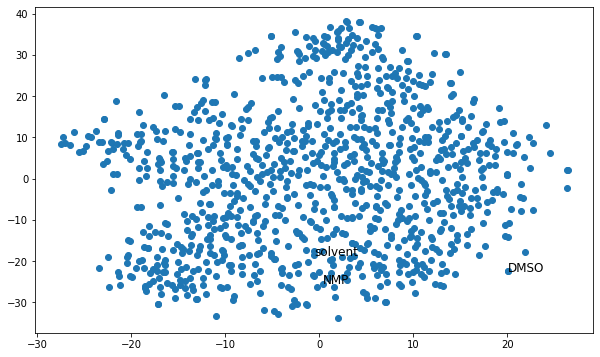

In [7]:
# # 将降维后的词向量进行可视化
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1])

# # 在可视化的图中高亮'solvent'、'NMP'和'DMSO'这些词
# highlight_words = ['solvent', 'NMP', 'DMSO']
# highlight_indices = [list(word_vectors.keys()).index(word) for word in highlight_words]

# for i in highlight_indices:
#     plt.annotate(list(word_vectors.keys())[i], (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=12)

# plt.show()

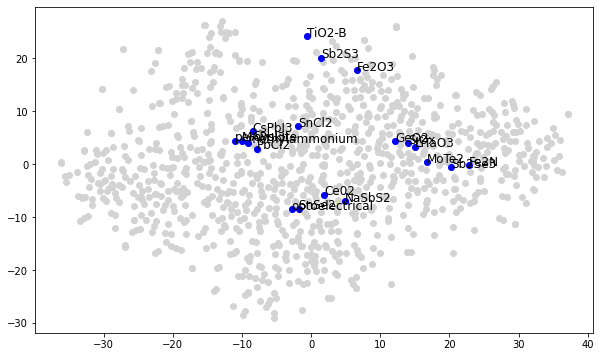

In [19]:
plt.figure(figsize=(10, 6))

# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 绘制高亮词汇的点
# highlight_words = ['MAPbI3','TiO2-B','SnSe2','TiO2-NR','Fe2O3','LiTaO3','α-NaFeO2','Ce02','Sb2S3','Sb2Se3','NaSbS2','SnCl2']
highlight_words = ['MAPbI3','perovskite','methylammonium','PbCl2','CsPbI3','optoelectrical','TiO2-B','SnSe2','Fe2O3','LiTaO3','Ce02','MoTe2','GeO2','SiOx','Fe2N','Sb2S3','Sb2Se3','NaSbS2','SnCl2']
# highlight_words = ['s']
highlight_indices = [list(word_vectors.keys()).index(word) for word in highlight_words]
highlight_color = 'blue'  # 更改为您想要的颜色

for i, j in enumerate(highlight_indices):
    plt.scatter(word_vectors_tsne[j, 0], word_vectors_tsne[j, 1], color=highlight_color)
    plt.annotate(list(word_vectors.keys())[j], (word_vectors_tsne[j, 0], word_vectors_tsne[j, 1]), fontsize=12)

plt.show()

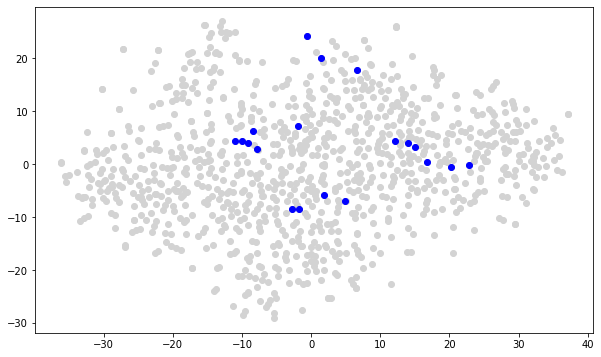

In [18]:
plt.figure(figsize=(10, 6))

# 绘制除高亮词汇外的点
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], color='lightgray')

# 绘制高亮词汇的点
# highlight_words = ['solvent', 'NMP', 'DMF','hexane','EDA','IPA','PVP','xylene','chlorobenzene','diamine','toluene','PVP','alcohol','γ-butyrolactone']
# highlight_words = ['MAPbI3','halide','perovskite','methylammonium','PbCl2','CsPbBr3','CsPbI3','DMSO','DMF','EDA']
highlight_words = ['MAPbI3','perovskite','methylammonium','PbCl2','CsPbI3','optoelectrical','TiO2-B','SnSe2','Fe2O3','LiTaO3','Ce02','MoTe2','GeO2','SiOx','Fe2N','Sb2S3','Sb2Se3','NaSbS2','SnCl2']
highlight_indices = [list(word_vectors.keys()).index(word) for word in highlight_words]
highlight_color = 'blue'

for j in highlight_indices:
    plt.scatter(word_vectors_tsne[j, 0], word_vectors_tsne[j, 1], color=highlight_color)
plt.savefig("高亮图11.png", dpi=300, bbox_inches='tight')
plt.show()